In [2]:
import keras
keras.__version__

'2.1.5'

### 과적합
- 이포크를 크게하면 과적합이 발생한다
- 기계학습에서는 과적합을 다루는 것이 매우 중요하다. 즉, 최적화와 일반화 사이의 조정 능력이 중요하다
- 최적화란 훈련 데이터에 대해서 가능하면 학습을 하여 성능을 높이는 것이고, 일반화란 새로운 데이터에 대해서도 잘 동작하는 능력을 말한다. 그러나 주어진 데이터는 학습데이터 뿐이므로 일반화에 대한 정답을 알아낼 수는 없다. 최대한 추정하고 맞출 수 있을 뿐이다.
- 학습을 시작한 초기에는 훈련 데이터에 대해서 성능이 좋아지는 것과 동시에 테스트 데이터에 대해서도 성능이 좋아진다. 이러한 동안은 과소적합 되는 기간이다 (아직 학습이 덜 된 것)
- 그러나 학습이 어느 정도 이루어진 이후에는 일반화의 성능이 오히려 떨어지기 시작한다. 즉, 검증데이터에 대한 성능이 떨어지는 것이다. 이는, 훈련 데이터에 대한 학습이 너무 상세하게 이루어져서 일반화의 성능이 떨이진 것이다.
- 과적합을 피하는 가장 좋은 방법은, 훈련 데이터가 더 많아야 한다. 많은 데이터로 훈련을 할수록 일반화 성능이 좋아진다. 또 다른 방법은 모델이 저장하는 정보를 가능한 줄여서 훈련 데이터에 대해 학습하여 기억하는 내용을 최대한 줄이는 방법이다. 모델이 기억하는 패턴이 적을수록 중요한 패턴 정보만 기억하게 되며 세세한 내용을 저장하지 않게 하는 것이다. 이렇게 과적합에 대응하는 것을 규제화라고 한다.
- IMDB 데이터를 사용하겠다.

In [3]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 132s 8us/step


### 과적합줄이기
#### 네트워크의 크기를 줄이는 방법
- 신경망의 계층수와 유닛 수를 줄여서 전체 파라미터의 수를 줄이는 것을 말한다. 파라미터의 전체 량을 capacity(용량)이라고 한다. 딥러닝에서는 용량이 큰 경우에 과적합할 가능성이 항상 높다는 것을 주의해야 한다.
- 신경망에서는 학습(fitting)보다 과적합을 잘 다루어야 한다. 용량을 조절하는 적절한 선택이 필요하다.
- 이러한 문제를 푸는 방법은, 처음에는 규모가 작은 모델에서 출발하는 것이다. 용량을 키우면서 일반화 성능이 떨어지면, 즉 검증 데이터에 대해서 성능이 떨어지면, 용량 키우는 것을 멈추어야 한다.
- 아래는 최초에 만들었던 신경망 구조이다.

In [4]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

- 작은 크기의 네트워크를 만들어보겠다.

In [11]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

- 위에 만든 작은 네트워크의 성능을 최초의 규모가 큰 네트워크와 비교하겠다.
- 아래 그림에서 점선이 작은 네트워크의 성능이고 + 는 원래 네트워크의 성능이다 (검증 손실이 적을수록 좋은 모델이다)

In [6]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 185us/step - loss: 0.4440 - acc: 0.8251 - val_loss: 0.3286 - val_acc: 0.8835
Epoch 2/20
25000/25000 [==============================] - 3s 127us/step - loss: 0.2573 - acc: 0.9078 - val_loss: 0.2864 - val_acc: 0.8882
Epoch 3/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.1991 - acc: 0.9292 - val_loss: 0.2821 - val_acc: 0.8891
Epoch 4/20
25000/25000 [==============================] - 3s 121us/step - loss: 0.1666 - acc: 0.9412 - val_loss: 0.2939 - val_acc: 0.8844
Epoch 5/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.1435 - acc: 0.9501 - val_loss: 0.3116 - val_acc: 0.8804
Epoch 6/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.1257 - acc: 0.9558 - val_loss: 0.3483 - val_acc: 0.8721
Epoch 7/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.1104 - acc: 0.9615 - val_loss: 0.3598 - 

In [7]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 125us/step - loss: 0.5804 - acc: 0.7027 - val_loss: 0.5309 - val_acc: 0.7558
Epoch 2/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.4843 - acc: 0.8455 - val_loss: 0.4876 - val_acc: 0.8280
Epoch 3/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.4389 - acc: 0.8920 - val_loss: 0.4663 - val_acc: 0.8497
Epoch 4/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.4077 - acc: 0.9154 - val_loss: 0.4526 - val_acc: 0.8663
Epoch 5/20
25000/25000 [==============================] - 3s 105us/step - loss: 0.3832 - acc: 0.9306 - val_loss: 0.4513 - val_acc: 0.8620
Epoch 6/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.3620 - acc: 0.9415 - val_loss: 0.4424 - val_acc: 0.8728
Epoch 7/20
25000/25000 [==============================] - 3s 104us/step - loss: 0.3425 - acc: 0.9518 - val_loss: 0.4484 - 

In [8]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

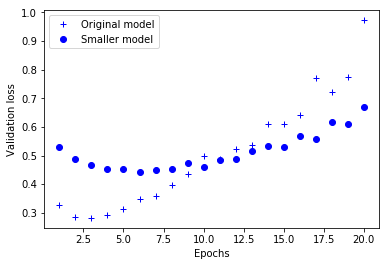

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- 작은 네트워크가 과적합을 늦게 시작하며, 과적합이 증가하는 속도가 느리다.
- 큰 네트워크는 과적합을 일찍 시작하며 과적합의 속도도 빠르다. 그러나 검증 성능은 더 우수하다.
- 이제 용량이 더 큰 네트워크를 만들어 비교하겠다.

In [11]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [12]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s - loss: 0.4539 - acc: 0.8011 - val_loss: 0.4150 - val_acc: 0.8229
Epoch 2/20
25000/25000 [==============================] - 3s - loss: 0.2148 - acc: 0.9151 - val_loss: 0.2742 - val_acc: 0.8901
Epoch 3/20
25000/25000 [==============================] - 3s - loss: 0.1217 - acc: 0.9544 - val_loss: 0.5442 - val_acc: 0.7975
Epoch 4/20
25000/25000 [==============================] - 3s - loss: 0.0552 - acc: 0.9835 - val_loss: 0.4316 - val_acc: 0.8842
Epoch 5/20
25000/25000 [==============================] - 3s - loss: 0.0662 - acc: 0.9888 - val_loss: 0.5098 - val_acc: 0.8822
Epoch 6/20
25000/25000 [==============================] - 3s - loss: 0.0017 - acc: 0.9998 - val_loss: 0.6867 - val_acc: 0.8811
Epoch 7/20
25000/25000 [==============================] - 3s - loss: 0.1019 - acc: 0.9882 - val_loss: 0.6737 - val_acc: 0.8800
Epoch 8/20
25000/25000 [==============================] - 3s 

- 아래 그림에서 점선은 더 큰 용량 네트워크의 성능이다. 성능이 오히려 나빠졌다.

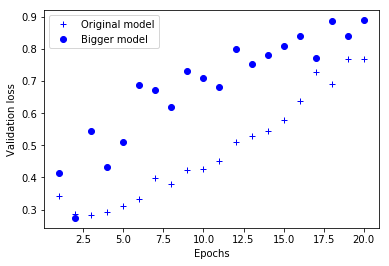

In [26]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- 처음부터 과적합이 일어났고 급격히 증가했다.
- 아래는 학습 데이터에 대한 손실함수를 나타냈다.

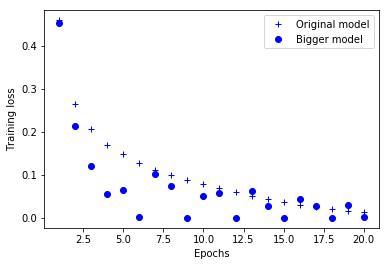

In [28]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

- 용량이 큰 모델은 학습 데이터에 대한 성능이 바로 매우 좋아지는 것을 알 수 있다. (0 으로 수렴)

### 가중치에 대한 규제화
- 모델이 단순할수록 과적합을 줄일 가능성이 높다 (같은 성능을 보이는 경우)
- 특정 가중치에 너무 의존하지 않는 모델을 만드는 것이 한 방법이다. 이를 실현하기 위해서 손실 함수에 규제화를 하는 항목을 추가하는 방법이 있다. 가중치가 커지는 것을 제한하는 추가의 비용 항목을 더하는 것이다.
- L1 규제와 L2 규제가 널리 사용된다.
- L1 규제는 가중치의 절대값의 합을 비용함수로 사용하며 L2 규제는 가중치의 자승의 합을 비용함수로  사용한다.


- 케라스에서는 _weight regularizer instances_ 인자를 사용하여 규제화를 할 수 있다.

In [17]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

- 위에서 l2(0.001)의 의미는 전체 네트워크 손실에 weight_coefficient_value * 0.001 크기를 더하여 가중치를 계산한다는 뜻이다.
- 여기서 주의할 것은 이러한 규제는 훈련 데이터에 대해서만 가하며 훈련 데이터에 대해서는 가하지 않는다. 따라서 훈련 데이터에 대한 손실함수 값이 테스트 데이터에 비하여 크게 나타난다.
- 아래에 L2 규제의 효과를 확인해보겠다.

In [19]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s - loss: 0.4880 - acc: 0.8218 - val_loss: 0.3820 - val_acc: 0.8798
Epoch 2/20
25000/25000 [==============================] - 2s - loss: 0.3162 - acc: 0.9068 - val_loss: 0.3353 - val_acc: 0.8896
Epoch 3/20
25000/25000 [==============================] - 2s - loss: 0.2742 - acc: 0.9185 - val_loss: 0.3306 - val_acc: 0.8898
Epoch 4/20
25000/25000 [==============================] - 2s - loss: 0.2489 - acc: 0.9288 - val_loss: 0.3363 - val_acc: 0.8866
Epoch 5/20
25000/25000 [==============================] - 2s - loss: 0.2420 - acc: 0.9318 - val_loss: 0.3492 - val_acc: 0.8820
Epoch 6/20
25000/25000 [==============================] - 2s - loss: 0.2322 - acc: 0.9359 - val_loss: 0.3567 - val_acc: 0.8788
Epoch 7/20
25000/25000 [==============================] - 2s - loss: 0.2254 - acc: 0.9385 - val_loss: 0.3632 - val_acc: 0.8787
Epoch 8/20
25000/25000 [==============================] - 2s 

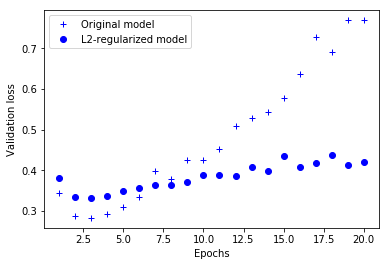

In [30]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- 위그림에 나타난 것과 같이, L2 규제를 사용하면(점선) 과대적합에 대해 더 안정적인 반응을 보이는 것을 알 수 있다. 사용하는 파라미터 수는 같다.
- 케라스에서 L1 규제 또는 L1과 L2 규제를 동시에 사용하는 방법은 아래와 같다.

In [12]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

### 드롭아웃
- 가장 널리 사용되는 규제화이다.
- 훈련이 일부 유닛의 출력을 랜덤하게 골라서 사용하지 않는 방법이다. 드롭아웃 비율은 0.2~0.5를 보통 사용한다.
- 실제 테스트 데이터에 적용할 때는 드롭아웃을 하지 않고 모든 유닛의 출력을 사용한다. 단 모든 출력의 크기를 드롭아웃 비율을 고려하려 줄여야 한다. (전달되는 신호의 총량을 비슷하게 맞추어야 신경망이 잘 동작한다)

In [ ]:
# At training time: we drop out 50% of the units in the output
layer_output *= np.randint(0, high=2, size=layer_output.shape)

- 위와 같이 훈련할 때 50%의 비율로 드롭아웃을 하면, 테스트 시에는 아래와 같이 평균 2배 크기를 키워야 한다.

In [ ]:
# At test time:
layer_output *= 0.5

- 또는 훈련할 때 미리 출력값을 두배로 키워서 사용하는 방법도 있다. 테스트를 할 때는 크기를 변환하지 않아도 되게 한다.

In [ ]:
# At training time:
layer_output *= np.randint(0, high=2, size=layer_output.shape)
# Note that we are scaling *up* rather scaling *down* in this case
layer_output /= 0.5

- 케라스에서는 드롭아웃을 다음과 같이 구현한다.

In [ ]:
model.add(layers.Dropout(0.5))

- 아래는 두개의 계층에 각각 드롭아웃을 적용한 것을 보여준다.

In [22]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [23]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s - loss: 0.6035 - acc: 0.6678 - val_loss: 0.4704 - val_acc: 0.8651
Epoch 2/20
25000/25000 [==============================] - 2s - loss: 0.4622 - acc: 0.8002 - val_loss: 0.3612 - val_acc: 0.8724
Epoch 3/20
25000/25000 [==============================] - 2s - loss: 0.3731 - acc: 0.8553 - val_loss: 0.2960 - val_acc: 0.8904
Epoch 4/20
25000/25000 [==============================] - 2s - loss: 0.3162 - acc: 0.8855 - val_loss: 0.2772 - val_acc: 0.8917
Epoch 5/20
25000/25000 [==============================] - 2s - loss: 0.2762 - acc: 0.9033 - val_loss: 0.2803 - val_acc: 0.8889
Epoch 6/20
25000/25000 [==============================] - 2s - loss: 0.2454 - acc: 0.9172 - val_loss: 0.2823 - val_acc: 0.8892
Epoch 7/20
25000/25000 [==============================] - 2s - loss: 0.2178 - acc: 0.9281 - val_loss: 0.2982 - val_acc: 0.8877
Epoch 8/20
25000/25000 [==============================] - 2s 

- 결과 그림은 아래와 같다.

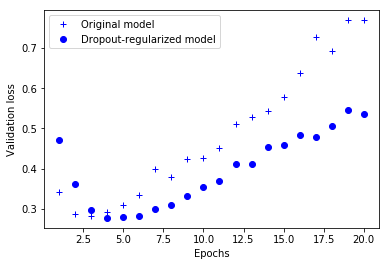

In [32]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- 결과를 보면 성능이 좋아진 것을 알 수 있다.
- 신경망에서 과적합을 줄이는 방법은 다음과 같다.
 - 훈련 데이터를 많이 사용한다.
 - 네트워크의 용량을 줄인다
 - 가중치에 규제를 가한다.
 - 드롭아웃을 시행한다.